## Does Experience beat skill in pressure situations?

We will analyse this question by looking at data on break points in a tennis game. Break points are certainly some of the most tense and exciting part of a tennis game and we  will analyse if experienced players win more breakpoints than maturing players.

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12


In [3]:
df_2019 = pd.read_csv("data/atp_matches_2019.csv")
df_2020 = pd.read_csv("data/atp_matches_2020.csv")
df_2021 = pd.read_csv("data/atp_matches_2021.csv")

seasons = [df_2019, df_2020, df_2021]
df_full = pd.concat(seasons)

# check whether we have same number of columns
# assert len(df_2019.columns) == len(df_full.columns)

df_full.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,c
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2.0,NaN,...,34.0,20.0,14.0,10.0,15.0,9.0,3590.0,16.0,1977.0,NaN
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4.0,NaN,...,36.0,7.0,10.0,10.0,13.0,16.0,1977.0,239.0,200.0,NaN
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2.0,NaN,...,15.0,6.0,8.0,1.0,5.0,9.0,3590.0,40.0,1050.0,NaN
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NaN,PR,...,38.0,9.0,11.0,4.0,6.0,239.0,200.0,31.0,1298.0,NaN
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4.0,NaN,...,46.0,19.0,15.0,2.0,4.0,16.0,1977.0,18.0,1855.0,NaN


In [36]:
df_full_copy= df_full[["winner_name","winner_age","score","w_bpSaved","w_bpFaced","l_bpSaved","l_bpFaced","winner_name","loser_age"]].copy()
df_full_copy.reset_index(drop=True, inplace=True)

In [37]:
df_full_copy["w_bpratio"]= df_full_copy["w_bpSaved"]/ df_full_copy["w_bpFaced"]
df_full_copy["l_bpratio"]= df_full_copy["l_bpSaved"]/ df_full_copy["l_bpFaced"]

In [38]:
df_full_copy.head()

,winner_name,winner_age,score,w_bpSaved,w_bpFaced,l_bpSaved,l_bpFaced,loser_name,loser_age,w_bpratio,l_bpratio
0,Kei Nishikori,29.004791,6-4 3-6 6-2,3.0,6.0,10.0,15.0,Daniil Medvedev,22.885695,0.5,0.666667
1,Daniil Medvedev,22.885695,7-6(6) 6-2,0.0,1.0,10.0,13.0,Jo-Wilfried Tsonga,33.705681,0.0,0.769231
2,Kei Nishikori,29.004791,6-2 6-2,2.0,2.0,1.0,5.0,Jeremy Chardy,31.882272,1.0,0.200000
3,Jo-Wilfried Tsonga,33.705681,6-4 7-6(2),4.0,5.0,4.0,6.0,Alex De Minaur,19.868583,0.8,0.666667
4,Daniil Medvedev,22.885695,6-7(2) 6-3 6-4,8.0,8.0,2.0,4.0,Milos Raonic,28.010951,1.0,0.500000


We will only consider games that had atleast 3 or more breakpoints so we get a good measure of generality.

In [39]:
df_full_copy= df_full_copy.loc[(df_full_copy["w_bpFaced"]>3.0) & (df_full_copy["l_bpFaced"]>3.0)]

First, lets look at how important it is to have a knack to win breakpoints.

In [90]:
conditions=[(df_full_copy["w_bpratio"]>= df_full_copy["l_bpratio"]),(df_full_copy["w_bpratio"]<= df_full_copy["l_bpratio"])]
values=["Game won by player with higher Break Points victory", "Game won by player with lower Break Points victory"]
df_full_copy["breakpoint_champ"]= np.select(conditions,values)

In [91]:
df_full_copy
new_df= df_full_copy.groupby("breakpoint_champ")['winner_name'].count()

In [92]:
new_df

breakpoint_champ
Game won by player with higher Break Points victory    2832
Game won by player with lower Break Points victory      904
Name: winner_name, dtype: int64

In [93]:
bp_cham_val= df_full_copy['breakpoint_champ'].value_counts().index.tolist()
bp_cham_valcount=df_full_copy["breakpoint_champ"].value_counts().tolist()

Text(0.5, 1.0, 'How important is it winning breakpoints?')

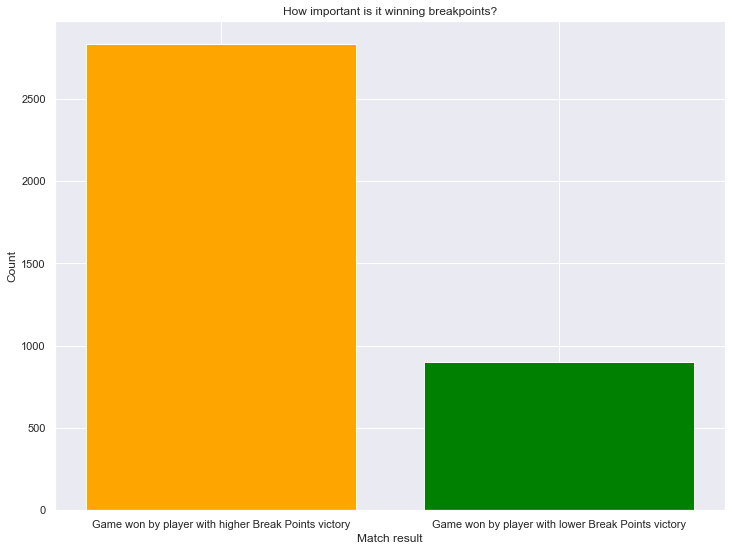

In [107]:
ax=plt.bar(bp_cham_val,bp_cham_valcount, color=['orange','green'])
plt.xlabel("Match result")
plt.ylabel("Count")
plt.title("How important is it winning breakpoints?")


Players who win more breakpoints are 3x more likey to win the match.

## What does it take to win a BreakPoint

Many say experience is key, lets see what the data has to say

We will analyse the data and patterns of players who were defeated and who emerged victorious seperately. But we will soon notice that both categories exhibit similar patterns.

In [122]:
loser_numeric= df_full[["loser_ht","loser_age","l_ace","l_df","l_svpt","l_1stIn","l_1stWon","l_2ndWon","l_SvGms","l_bpSaved","l_bpFaced","tourney_level"]]
loser_numeric=loser_numeric.dropna()
loser_numeric.reset_index(drop=True, inplace=True)

In [117]:
winner_numeric= df_full[["winner_ht","winner_age","w_ace","w_df","w_svpt","w_1stIn","w_1stWon","w_2ndWon","w_SvGms","w_bpSaved","w_bpFaced","tourney_level"]]
winner_numeric=winner_numeric.dropna()
winner_numeric.reset_index(drop=True, inplace=True)

In [123]:
loser_numeric["l_bpratio"]= loser_numeric["l_bpSaved"]/ loser_numeric["l_bpFaced"]

In [124]:
winner_numeric["w_bpratio"]= winner_numeric["w_bpSaved"]/ winner_numeric["w_bpFaced"]

In [25]:
def standardize_columns(data):
    '''
    Input:
      data (data frame): contains only numeric columns
    Output:
      data frame, the same data, except each column is standardized 
      to have 0-mean and unit variance
    '''

    standardized_data= (data-data.mean())/ data.std()
  
    return standardized_data

In [26]:
loser_numeric['loser_age']= standardize_columns(loser_numeric["loser_age"])

In [125]:
loser_numeric.loc[loser_numeric['loser_age']<=18, 'Experience']= 'under-18'
loser_numeric.loc[loser_numeric['loser_age']>18, 'Experience']= 'Rookie'
loser_numeric.loc[loser_numeric['loser_age']>23, 'Experience']= 'Intermediate'
loser_numeric.loc[loser_numeric['loser_age']>26, 'Experience']= 'Professional'
loser_numeric.loc[loser_numeric['loser_age']>30, 'Experience']= 'Veteran'

In [126]:
winner_numeric.loc[winner_numeric['winner_age']<=18, 'Experience']= 'under-18'
winner_numeric.loc[winner_numeric['winner_age']>18, 'Experience']= 'Rookie'
winner_numeric.loc[winner_numeric['winner_age']>23, 'Experience']= 'Intermediate'
winner_numeric.loc[winner_numeric['winner_age']>26, 'Experience']= 'Professional'
winner_numeric.loc[winner_numeric['winner_age']>30, 'Experience']= 'Veteran'

In [128]:
winner_numeric

,winner_ht,winner_age,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,tourney_level,w_bpratio,Experience
0,178.0,29.004791,3.0,3.0,77.0,44.0,31.0,17.0,13.0,3.0,6.0,A,0.5,Professional
1,198.0,22.885695,10.0,1.0,52.0,33.0,28.0,14.0,10.0,0.0,1.0,A,0.0,Rookie
2,178.0,29.004791,2.0,2.0,47.0,33.0,26.0,9.0,8.0,2.0,2.0,A,1.0,Professional
3,188.0,33.705681,12.0,2.0,68.0,43.0,34.0,15.0,11.0,4.0,5.0,A,0.8,Veteran
4,198.0,22.885695,12.0,3.0,105.0,68.0,48.0,25.0,16.0,8.0,8.0,A,1.0,Rookie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,193.0,24.550308,5.0,0.0,27.0,23.0,22.0,2.0,6.0,0.0,0.0,D,NaN,Intermediate
4896,180.0,19.077344,14.0,0.0,52.0,33.0,27.0,13.0,10.0,0.0,0.0,D,NaN,Rookie
4897,185.0,29.453799,2.0,0.0,37.0,19.0,16.0,13.0,8.0,1.0,2.0,D,0.5,Professional
4898,185.0,29.453799,5.0,1.0,60.0,31.0,29.0,19.0,11.0,0.0,0.0,D,NaN,Professional


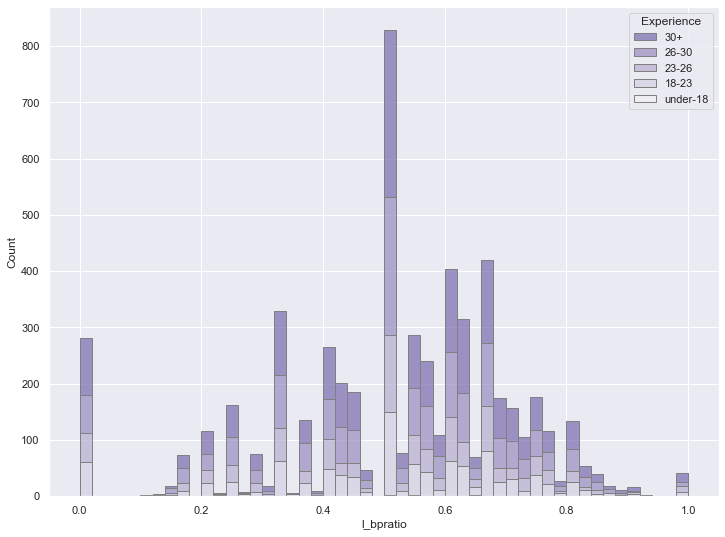

In [130]:
sns.set_theme(style="darkgrid")
loser_numeric.loc[loser_numeric['loser_age']<=18, 'Experience']= 'under-18'
loser_numeric.loc[loser_numeric['loser_age']>18, 'Experience']= '18-23'
loser_numeric.loc[loser_numeric['loser_age']>23, 'Experience']= '23-26'
loser_numeric.loc[loser_numeric['loser_age']>26, 'Experience']= '26-30'
loser_numeric.loc[loser_numeric['loser_age']>30, 'Experience']= '30+'

hue_order = ["30+",'26-30','23-26','18-23','under-18' ]

plot = sns.histplot(loser_numeric, x="l_bpratio",hue="Experience", multiple="stack",
                    palette="light:m_r",hue_order=hue_order, edgecolor=".5",
                    bins = 50)


Here we see that there is no one specific region that is been entirely dominated by a certain "Experience category".

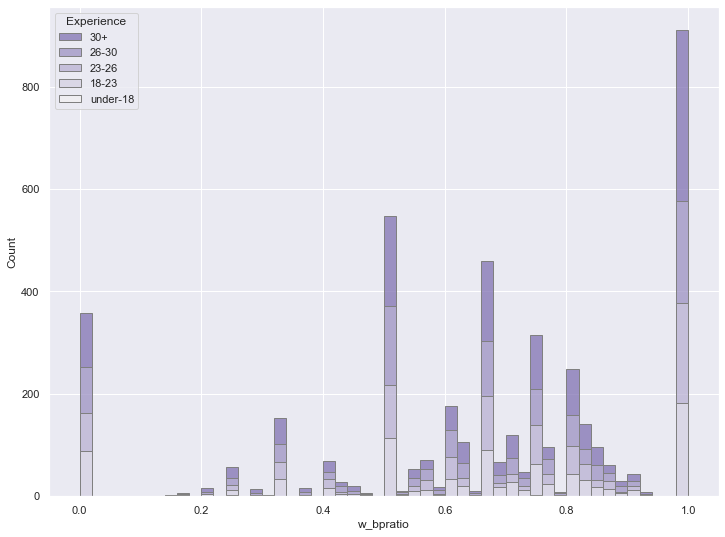

In [131]:
sns.set_theme(style="darkgrid")
winner_numeric.loc[winner_numeric['winner_age']<=18, 'Experience']= 'under-18'
winner_numeric.loc[winner_numeric['winner_age']>18, 'Experience']= '18-23'
winner_numeric.loc[winner_numeric['winner_age']>23, 'Experience']= '23-26'
winner_numeric.loc[winner_numeric['winner_age']>26, 'Experience']= '26-30'
winner_numeric.loc[winner_numeric['winner_age']>30, 'Experience']= '30+'

hue_order = ["30+",'26-30','23-26','18-23','under-18' ]

plot = sns.histplot(winner_numeric, x="w_bpratio",hue="Experience", multiple="stack",
                    palette="light:m_r",hue_order=hue_order, edgecolor=".5",
                    bins = 50)


The same pattern is noticed with players who emerged victorious in a game.

## Games with a age difference of 5 years

Let's filter a bit more now. We will consider games that have atlease 5 or more years in age difference. This should really expose the effects of experience if there is any.

In [132]:
diff_age= df_full_copy.loc[abs(df_full_copy['winner_age']- df_full_copy['loser_age'])>5]

In [133]:
conditions=[(diff_age["winner_age"]> diff_age['loser_age'])& (diff_age['w_bpratio']>=diff_age['l_bpratio']),
            (diff_age["winner_age"]> diff_age['loser_age'])& (diff_age['l_bpratio']>diff_age['w_bpratio']),
            (diff_age["winner_age"]<diff_age['loser_age'])& (diff_age['w_bpratio']>=diff_age['l_bpratio']),
            (diff_age["winner_age"]< diff_age['loser_age'])& (diff_age['w_bpratio']<diff_age['l_bpratio'])]

values=['More Experience','Less Experience','Less Experience','More Experience']

C:\Users\pavan\AppData\Local\Temp/ipykernel_5356/951225137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_age['bp_winner']= np.select(conditions,values)


Text(0.5, 1.0, 'Who wins more breakpoints?')

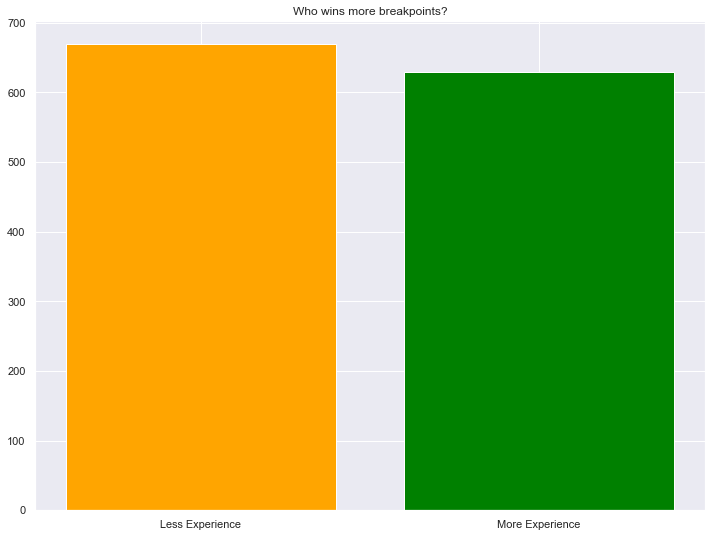

In [135]:
diff_age['bp_winner']= np.select(conditions,values)
bp_cham_val= diff_age['bp_winner'].value_counts().index.tolist()
bp_cham_valcount=diff_age["bp_winner"].value_counts().tolist()

plt.bar(bp_cham_val,bp_cham_valcount, color=['orange','green'])
plt.title("Who wins more breakpoints?")


Much to our surprise we see that the proportion of victories is almost 50-50.

<AxesSubplot:xlabel='Experience', ylabel='l_bpratio'>

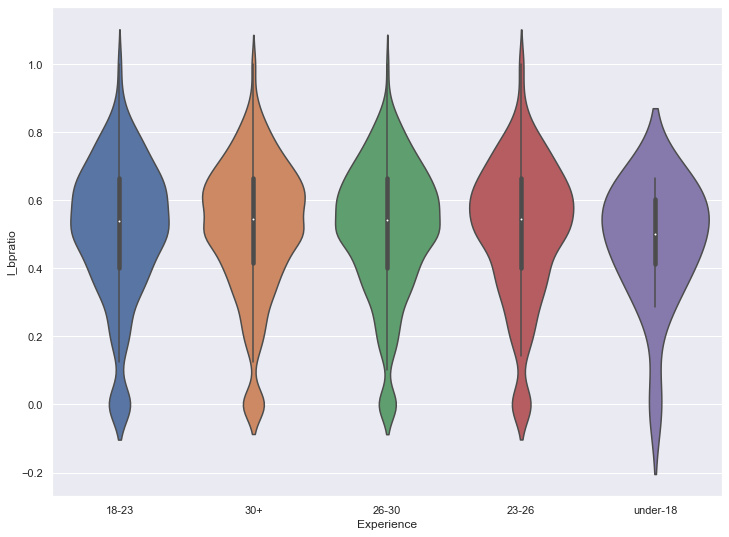

In [61]:
sns.violinplot(x='Experience', y='l_bpratio',data=loser_numeric)

The violin plot really shows that as well. The probability distribution of player across different "Experience" categories carry a uncanny resemblence to each other.

<AxesSubplot:xlabel='Experience', ylabel='w_bpratio'>

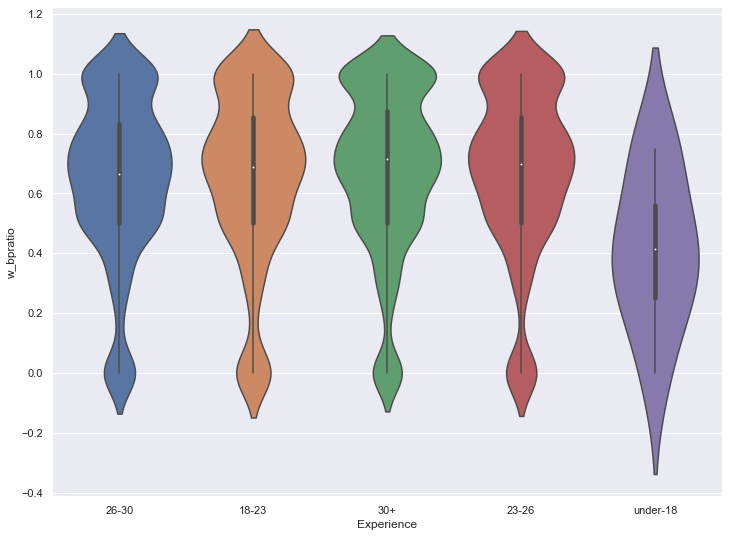

In [136]:
sns.violinplot(x='Experience', y='w_bpratio',data=winner_numeric)

We notice that in both plots, the under-18 category exhibts a slightly lower brek point victory ratio. This is our first evidence of youngers players struglling with pressure.

## Does Tournament Level change things up?

In [75]:
loser_numeric.reset_index(drop=True, inplace=True)
loser_numeric['tourney_level'].replace({'G': 'Grand Slams', 'M': 'Masters 1000s',
                                  'A': 'other', 'C': 'other', 'S': 'other',
                                  'F': 'other', 'D': 'other'}, inplace=True)



Text(0.5, 1.0, 'Change in Breakpoint ratios across different tournament standards')

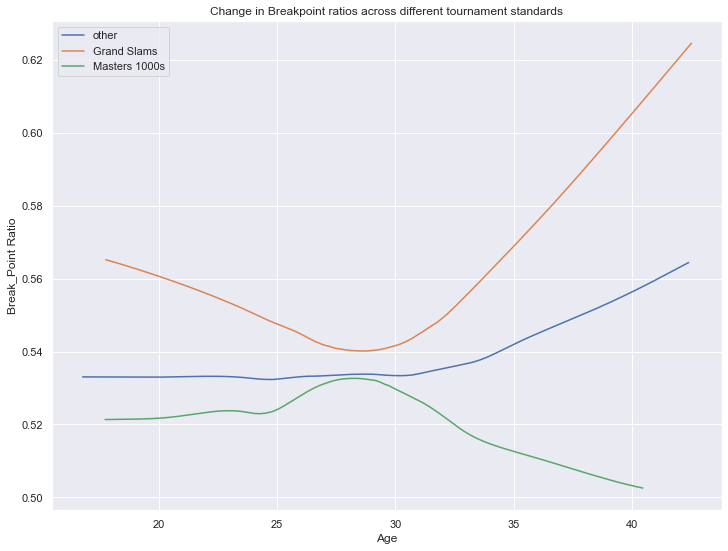

In [74]:
from statsmodels.nonparametric.smoothers_lowess import lowess
d={"age": loser_numeric["loser_age"], "bp_ratio": loser_numeric["l_bpratio"],"Tournament":loser_numeric['tourney_level']}
age_counts= pd.DataFrame(data=d)

tourney_list= age_counts["Tournament"].unique()
for tourney in tourney_list:
    age_data= age_counts.loc[age_counts['Tournament']== tourney]
    yobs= age_data['bp_ratio']
    x_obs= age_data['age']
    ysmooth= lowess(yobs,x_obs,return_sorted=False)
    sns.lineplot(x=x_obs,y=ysmooth,label= tourney)
    plt.legend()
plt.xlabel("Age")
plt.ylabel("Break_Point Ratio")
plt.title("Change in Breakpoint ratios across different tournament standards")

In [137]:
winner_numeric.reset_index(drop=True, inplace=True)
winner_numeric['tourney_level'].replace({'G': 'Grand Slams', 'M': 'Masters 1000s',
                                  'A': 'other', 'C': 'other', 'S': 'other',
                                  'F': 'other', 'D': 'other'}, inplace=True)



Text(0.5, 1.0, 'Change in Breakpoint ratios across different tournament standards')

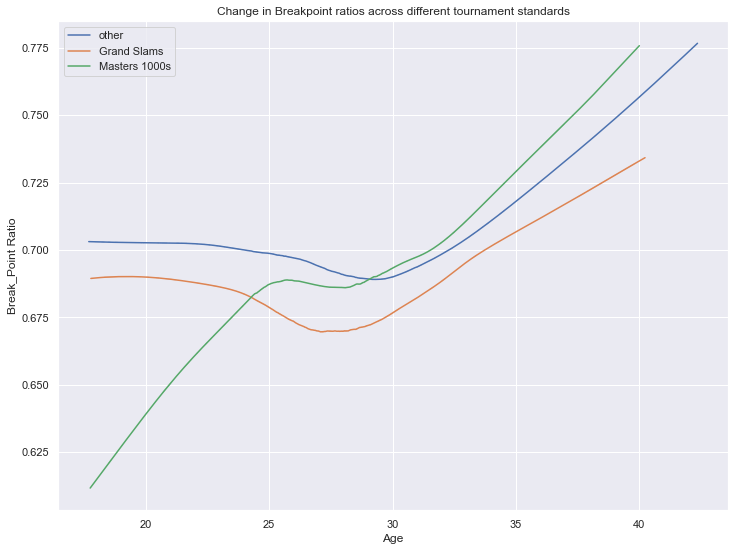

In [141]:
from statsmodels.nonparametric.smoothers_lowess import lowess
d={"age": winner_numeric["winner_age"], "bp_ratio": winner_numeric["w_bpratio"],"Tournament":winner_numeric['tourney_level']}
age_counts= pd.DataFrame(data=d)

tourney_list= age_counts["Tournament"].unique()
for tourney in tourney_list:
    age_data= age_counts.loc[age_counts['Tournament']== tourney]
    yobs= age_data['bp_ratio']
    x_obs= age_data['age']
    ysmooth= lowess(yobs,x_obs,return_sorted=False)
    sns.lineplot(x=x_obs,y=ysmooth,label= tourney)
    plt.legend()
plt.xlabel("Age")
plt.ylabel("Break_Point Ratio")
plt.title("Change in Breakpoint ratios across different tournament standards")

After smoothening and estimating using the lowess function, we notice a trend in the Grand Slams (the pinnacle of professional tennis). We notice that the Break Point Ratio does not change by much with increase in age. Whereas in some lower tournament classes such as the Master 1000s and ATP500, there is a much higher change where break point ratio increases with age. But this change is still not definite enough to prove that experience beats skill during break points.